In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
project_path = "/content/drive/My Drive/DataScienceProjects/spotify-song-analysis"
data_path = f"{project_path}/data"

In [110]:
import pandas as pd

In [111]:
df = pd.read_csv(f"{data_path}/songs_normalize.csv")

In [112]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [113]:
df['genre'].value_counts().head(10)

,count
genre,
pop,428
"hip hop, pop",277
"hip hop, pop, R&B",244
"pop, Dance/Electronic",221
"pop, R&B",178
hip hop,124
"hip hop, pop, Dance/Electronic",78
rock,58
"rock, pop",43


In [114]:
df = df[df['genre'] != 'set()']
df = df[df['genre'] != 'latin']

In [115]:
df['genre_simple'] = df['genre'].str.split(', ').str[0].explode()
df['genre_simple'].value_counts().head()

,count
genre_simple,
pop,936
hip hop,776
rock,162
Dance/Electronic,41
R&B,13


In [116]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness']

genre_stats = df.groupby('genre_simple')[features].mean().sort_values(by='danceability', ascending=False)
genre_stats.head()

,danceability,energy,valence,tempo,acousticness,speechiness
genre_simple,,,,,,
hip hop,0.717843,0.698778,0.560668,118.098709,0.116326,0.152094
Dance/Electronic,0.684610,0.775829,0.523585,125.507537,0.068404,0.059251
R&B,0.663462,0.688077,0.633308,106.924846,0.111138,0.121123
pop,0.647753,0.721256,0.547501,120.596985,0.146330,0.075110
World/Traditional,0.603000,0.685700,0.653700,110.333200,0.272961,0.079530


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

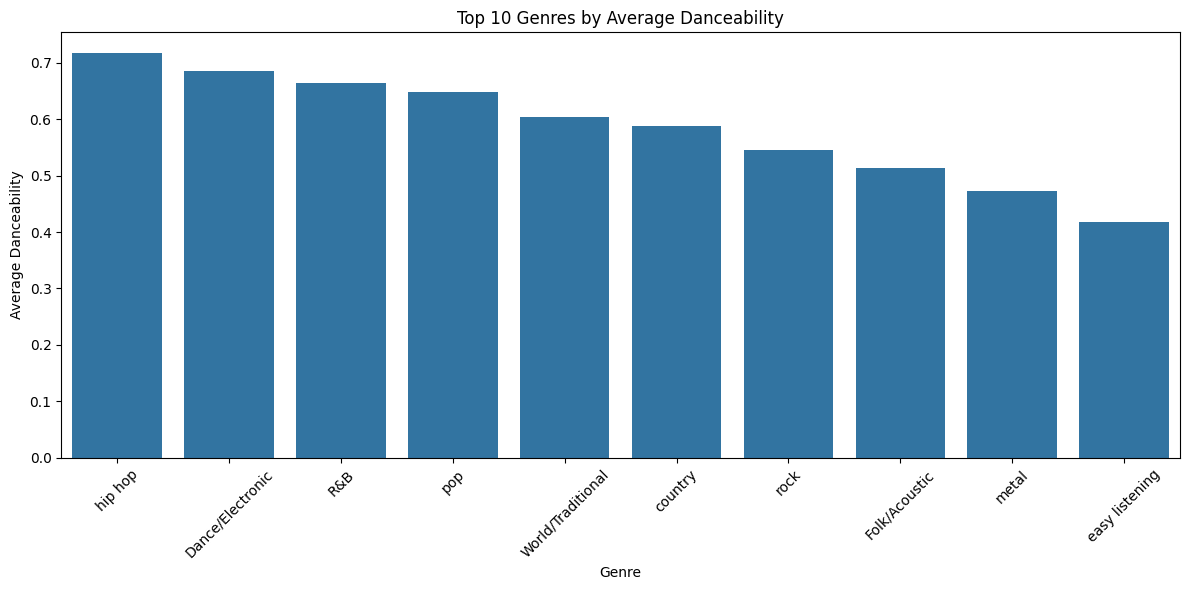

In [118]:
plt.figure(figsize = (12, 6))
sns.barplot(data = genre_stats.reset_index().head(10), x = 'genre_simple', y = 'danceability')
plt.xticks(rotation=45)
plt.title("Top 10 Genres by Average Danceability")
plt.xlabel("Genre")
plt.ylabel("Average Danceability")
plt.tight_layout()
plt.show()

In [119]:
import numpy as np

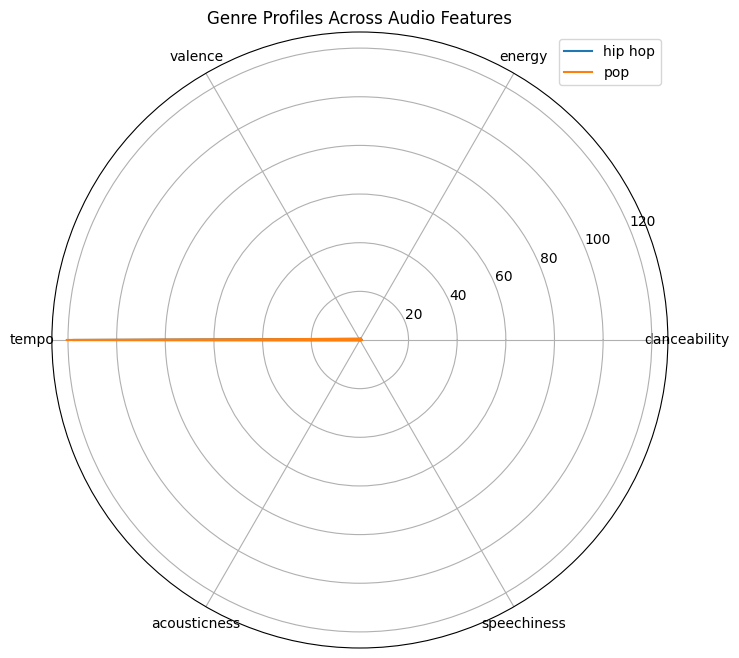

In [128]:
selected_genres = ['pop', 'hip hop']
stats_subset = df[df['genre_simple'].isin(selected_genres)].groupby('genre_simple')[features].mean()

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize = (8, 8))
for genre in stats_subset.index:
  values = stats_subset.loc[genre].values.tolist()
  values += values[:1]
  plt.polar(angles, values, label = genre)

plt.xticks(angles[:-1], labels, fontsize = 10)
plt.title("Genre Profiles Across Audio Features")
plt.legend(loc = 'upper right')
plt.show()

In [130]:
genre_year = df.groupby(['year', 'genre_simple'])[features].mean().reset_index()
genre_year.head()

,year,genre_simple,danceability,energy,valence,tempo,acousticness,speechiness
0,1998,hip hop,0.727000,0.445000,0.527000,81.125000,0.339000,0.291000
1,1999,Dance/Electronic,0.808000,0.982000,0.961000,124.999000,0.058500,0.031100
2,1999,hip hop,0.785857,0.745143,0.608000,129.879429,0.142086,0.150557
3,1999,pop,0.638913,0.711870,0.539013,122.853826,0.167421,0.044861
4,1999,rock,0.632000,0.773167,0.594167,118.056000,0.035063,0.064700
